In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
data=pd.read_csv("C:\\Users\\subha\\OneDrive\\Desktop\\proj\\archive\\client_012.csv")

In [3]:
data.head()

,Sr.No.,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,1,35,services,married,secondary,no,142,yes,no,cellular,20,nov,315,2,no
1,2,43,admin.,married,secondary,no,388,yes,no,cellular,19,nov,111,2,no
2,3,49,admin.,married,secondary,no,381,no,no,cellular,5,aug,504,2,no
3,4,42,admin.,divorced,secondary,no,2397,yes,no,cellular,15,apr,239,2,no
4,5,37,technician,married,secondary,no,1063,yes,no,cellular,31,jul,413,2,no


In [4]:
data.shape

(11302, 15)

In [5]:
data.columns

Index(['Sr.No.', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'y'],
      dtype='object')

In [6]:
data.describe()

,Sr.No.,age,balance,day,duration,campaign
count,11302.000000,11302.000000,11302.000000,11302.000000,11302.000000,11302.000000
mean,5651.500000,40.910458,1317.469297,15.886834,257.718899,2.759246
std,3262.750706,10.561325,2871.568463,8.211458,256.609667,3.152187
min,1.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000
25%,2826.250000,33.000000,69.000000,9.000000,103.000000,1.000000
50%,5651.500000,39.000000,431.000000,16.000000,179.000000,2.000000
75%,8476.750000,48.000000,1377.000000,21.000000,316.000000,3.000000
max,11302.000000,95.000000,66721.000000,31.000000,3253.000000,63.000000


In [7]:
#missing values
data.isnull().sum()

Sr.No.       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [8]:
data.y.value_counts()

y
no     10002
yes     1300
Name: count, dtype: int64

In [9]:
data=data.rename(columns={"y":"client_subscribed"})

In [10]:
#Target
data.client_subscribed.value_counts()

client_subscribed
no     10002
yes     1300
Name: count, dtype: int64

In [11]:
data.columns

Index(['Sr.No.', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'client_subscribed'],
      dtype='object')

In [12]:
data.dtypes

Sr.No.                int64
age                   int64
job                  object
marital              object
education            object
default              object
balance               int64
housing              object
loan                 object
contact              object
day                   int64
month                object
duration              int64
campaign              int64
client_subscribed    object
dtype: object

# Data Type Conversion

In [13]:
#label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
data.job=le.fit_transform(data.job)
data.marital=le.fit_transform(data.marital)
data.education=le.fit_transform(data.education)
data.default=le.fit_transform(data.default)
data.housing=le.fit_transform(data.housing)
data.loan=le.fit_transform(data.loan)
data.contact=le.fit_transform(data.contact)
data.month=le.fit_transform(data.month)
data.client_subscribed=le.fit_transform(data.client_subscribed)

In [15]:
data.dtypes

Sr.No.               int64
age                  int64
job                  int32
marital              int32
education            int32
default              int32
balance              int64
housing              int32
loan                 int32
contact              int32
day                  int64
month                int32
duration             int64
campaign             int64
client_subscribed    int32
dtype: object

In [16]:
data=data.drop(["Sr.No."],axis=1)

# Model Building

In [17]:
data.shape

(11302, 14)

In [18]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [19]:
x.head(1)
#y.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign
0,35,7,1,1,0,142,1,0,0,20,9,315,2


In [20]:
data.client_subscribed.value_counts()

client_subscribed
0    10002
1     1300
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=100)

In [23]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((9041, 13), (2261, 13), (9041,), (2261,))

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [25]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [26]:
lg_p=lg.predict(x_te)
lg_p

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
pred_prob=lg.predict_proba(x_te)
pred_prob

array([[9.15289004e-01, 8.47109963e-02],
       [9.26050824e-01, 7.39491765e-02],
       [9.44866533e-01, 5.51334671e-02],
       ...,
       [8.93073953e-01, 1.06926047e-01],
       [9.75986599e-01, 2.40134009e-02],
       [1.00000000e+00, 1.00537952e-11]])

In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
lg_m=confusion_matrix(lg_p,y_te)
lg_m

array([[1964,  216],
       [  39,   42]], dtype=int64)

In [30]:
lg_acc=lg_m.diagonal().sum()/lg_m.sum()*100
lg_acc

88.7218045112782

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2180
           1       0.16      0.52      0.25        81

    accuracy                           0.89      2261
   macro avg       0.57      0.71      0.59      2261
weighted avg       0.95      0.89      0.91      2261



In [33]:
data.client_subscribed.value_counts()

client_subscribed
0    10002
1     1300
Name: count, dtype: int64

In [34]:
#AUC-ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [35]:
df=pd.DataFrame(pred_prob)
df

,0,1
0,0.915289,8.471100e-02
1,0.926051,7.394918e-02
2,0.944867,5.513347e-02
3,0.981498,1.850206e-02
4,0.994983,5.017392e-03
...,...,...
2256,0.998050,1.950268e-03
2257,0.955137,4.486344e-02
2258,0.893074,1.069260e-01
2259,0.975987,2.401340e-02


In [36]:
fpr,tpr,thrshold=roc_curve(y_te,df.iloc[:,1])

In [37]:
fpr

array([0.00000000e+00, 4.99251123e-04, 4.99251123e-04, 9.98502247e-04,
       9.98502247e-04, 1.49775337e-03, 1.49775337e-03, 1.99700449e-03,
       1.99700449e-03, 2.49625562e-03, 2.49625562e-03, 3.49475786e-03,
       3.49475786e-03, 3.99400899e-03, 3.99400899e-03, 4.99251123e-03,
       4.99251123e-03, 5.99101348e-03, 5.99101348e-03, 6.49026460e-03,
       6.49026460e-03, 6.98951573e-03, 6.98951573e-03, 7.48876685e-03,
       7.48876685e-03, 7.98801797e-03, 7.98801797e-03, 8.48726910e-03,
       8.48726910e-03, 8.98652022e-03, 8.98652022e-03, 9.98502247e-03,
       9.98502247e-03, 1.09835247e-02, 1.09835247e-02, 1.14827758e-02,
       1.14827758e-02, 1.24812781e-02, 1.24812781e-02, 1.34797803e-02,
       1.34797803e-02, 1.39790315e-02, 1.39790315e-02, 1.44782826e-02,
       1.44782826e-02, 1.49775337e-02, 1.49775337e-02, 1.69745382e-02,
       1.69745382e-02, 1.94707938e-02, 1.94707938e-02, 1.99700449e-02,
       1.99700449e-02, 2.04692961e-02, 2.04692961e-02, 2.14677983e-02,
      

In [38]:
tpr

array([0.        , 0.        , 0.00387597, 0.00387597, 0.00775194,
       0.00775194, 0.01550388, 0.01550388, 0.03488372, 0.03488372,
       0.03875969, 0.03875969, 0.04263566, 0.04263566, 0.0503876 ,
       0.0503876 , 0.05426357, 0.05426357, 0.06589147, 0.06589147,
       0.06976744, 0.06976744, 0.07364341, 0.07364341, 0.08139535,
       0.08139535, 0.08527132, 0.08527132, 0.09302326, 0.09302326,
       0.10465116, 0.10465116, 0.10852713, 0.10852713, 0.1124031 ,
       0.1124031 , 0.13565891, 0.13565891, 0.13953488, 0.13953488,
       0.14728682, 0.14728682, 0.15116279, 0.15116279, 0.15503876,
       0.15503876, 0.15891473, 0.15891473, 0.1627907 , 0.1627907 ,
       0.16666667, 0.16666667, 0.17829457, 0.17829457, 0.18217054,
       0.18217054, 0.18992248, 0.18992248, 0.19379845, 0.19379845,
       0.19767442, 0.19767442, 0.20155039, 0.20155039, 0.20930233,
       0.20930233, 0.21705426, 0.21705426, 0.23643411, 0.23643411,
       0.24418605, 0.24418605, 0.25193798, 0.25193798, 0.25581

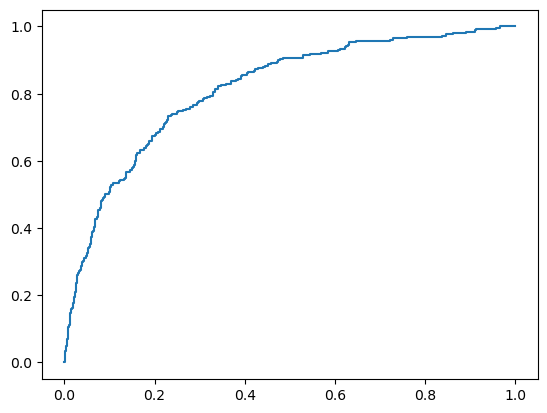

In [39]:
plt.plot(fpr,tpr)

In [40]:
#PRC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [41]:
precision,recall,thershold=precision_recall_curve(y_te,df.iloc[:,1])

In [42]:
precision

array([0.1141088 , 0.11415929, 0.11420983, ..., 0.5       , 0.        ,
       1.        ])

In [43]:
recall

array([1.        , 1.        , 1.        , ..., 0.00387597, 0.        ,
       0.        ])

Text(0.5, 1.0, 'Precision-Recall')

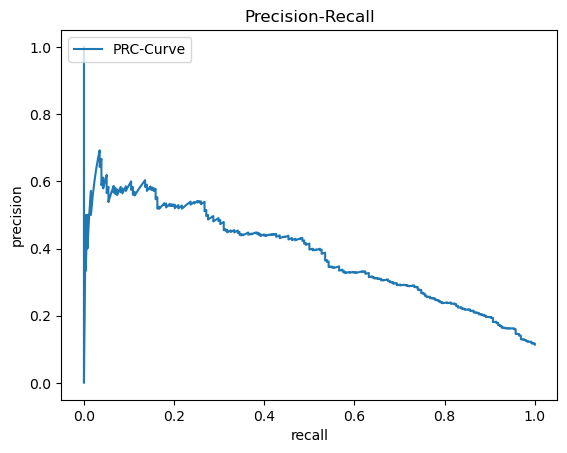

In [44]:
plt.plot(recall,precision,label="PRC-Curve")
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="upper left")
plt.title("Precision-Recall")

In [45]:
#tpr=tp/(tp+fn)
tpr=1964/(1964+39)
tpr

0.9805292061907139

In [46]:
#fpr=fp/(fp+tn)
fpr=216/(216+42)
fpr

0.8372093023255814

In [47]:
#precision=tp/(tp+fp)
precesion=1964/(1964+216)
precesion

0.9009174311926605

In [48]:
#f1score=2(precesion*recall)/(precision+recall)
f1score=(2*(precesion*tpr))/(precesion+tpr)
f1score

0.9390389672483863

# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [50]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [51]:
dt_p=dt.predict(x_te)
dt_p

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
dt_m=confusion_matrix(dt_p,y_te)
dt_m

array([[1841,  154],
       [ 162,  104]], dtype=int64)

In [53]:
dt_acc=dt_m.diagonal().sum()/dt_m.sum()*100
dt_acc

86.02388323750553

In [54]:
dt.feature_importances_

array([0.12592742, 0.05521264, 0.01503707, 0.0269483 , 0.00108471,
       0.12562713, 0.0233052 , 0.01208017, 0.02999074, 0.10813671,
       0.10609198, 0.33169681, 0.03886111])

In [55]:
dt_df=pd.DataFrame({"Importance":list(dt.feature_importances_),"Columns":list(x)})
dt_df

,Importance,Columns
0,0.125927,age
1,0.055213,job
2,0.015037,marital
3,0.026948,education
4,0.001085,default
5,0.125627,balance
6,0.023305,housing
7,0.012080,loan
8,0.029991,contact
9,0.108137,day


In [56]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1995
           1       0.40      0.39      0.40       266

    accuracy                           0.86      2261
   macro avg       0.66      0.66      0.66      2261
weighted avg       0.86      0.86      0.86      2261



In [57]:
#tpr=tp/(tp+fn)
tpr1=1843/(1843+108)
tpr1

0.9446437724243978

In [58]:
#fpr=fp/(fp+tn)
fpr1=150/(150+108)
fpr1

0.5813953488372093

In [59]:
#precision=tp/(tp+fp)
precesion1=1843/(1843+150)
precesion1

0.9247365780230807

In [60]:
#f1score=2(precesion*recall)/(precision+recall)
f1score1=(2*(precesion1*tpr1))/(precesion1+tpr1)
f1score1

0.9345841784989858

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [62]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [63]:
rf_p=rf.predict(x_te)
rf_p

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
rf_m=confusion_matrix(rf_p,y_te)
rf_m

array([[1952,  189],
       [  51,   69]], dtype=int64)

In [65]:
rf_acc=rf_m.diagonal().sum()/rf_m.sum()*100
rf_acc

89.38522777532066

In [66]:
print(classification_report(rf_p,y_te))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2141
           1       0.27      0.57      0.37       120

    accuracy                           0.89      2261
   macro avg       0.62      0.74      0.65      2261
weighted avg       0.94      0.89      0.91      2261



In [67]:
#tpr=tp/(tp+fn)
tpr2=1946/(1946+57)
tpr2

0.9715426859710434

In [68]:
#fpr=fp/(fp+tn)
fpr2=193/(193+65)
fpr2

0.748062015503876

In [69]:
#precision=tp/(tp+fp)
precesion2=1946/(1950+193)
precesion2

0.9080727951469902

In [70]:
#f1score=2(precesion*recall)/(precision+recall)
f1score2=(2*(precesion2*tpr2))/(precesion2+tpr2)
f1score2

0.9387361312108057

# K Nearest Neighbors

In [71]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25)

In [72]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=25)

In [73]:
knn_p=knn.predict(x_te)

In [74]:
knn_m=confusion_matrix(knn_p,y_te)
knn_m

array([[1963,  215],
       [  40,   43]], dtype=int64)

In [75]:
knn_acc=knn_m.diagonal().sum()/knn_m.sum()*100
knn_acc

88.7218045112782

In [76]:
print(classification_report(knn_p,y_te))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2178
           1       0.17      0.52      0.25        83

    accuracy                           0.89      2261
   macro avg       0.57      0.71      0.60      2261
weighted avg       0.95      0.89      0.91      2261



In [77]:
lst=list()

In [78]:
for i in range(1,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    knp=knn.predict(x_te)
    c=confusion_matrix(knp,y_te)
    acc=c.diagonal().sum()/c.sum()*100
    lst.append(acc)

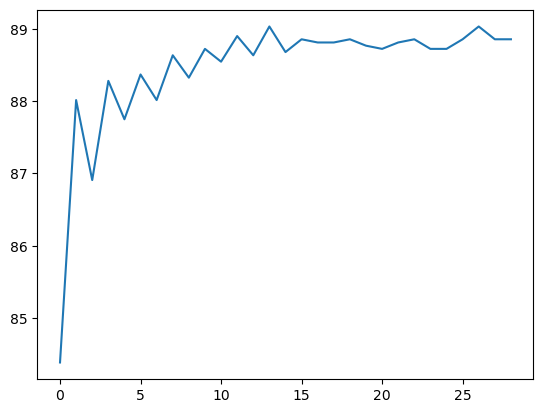

In [79]:
p=plt.plot(lst)

In [80]:
#tpr=tp/(tp+fn)
tpr3=1963/(1963+40)
tpr3

0.9800299550673989

In [81]:
#fpr=fp/(fp+tn)
fpr3=215/(215+43)
fpr3

0.8333333333333334

In [82]:
#precision=tp/(tp+fp)
precesion3=1963/(1963+215)
precesion3

0.9012855831037649

In [83]:
#f1score=2(precesion*recall)/(precision+recall)
f1score3=(2*(precesion3*tpr3))/(precesion3+tpr3)
f1score3

0.9390098062664434

# Support Vector Machine

In [84]:
from sklearn.svm import SVC
svc=SVC()

In [85]:
svc.fit(x_tr,y_tr)

SVC()

In [86]:
svc_p=svc.predict(x_te)

In [87]:
svc_m=confusion_matrix(svc_p,y_te)
svc_m

array([[2001,  256],
       [   2,    2]], dtype=int64)

In [88]:
svc_acc=svc_m.diagonal().sum()/svc_m.sum()*100

In [89]:
svc_acc

88.5891198584697

In [90]:
print(classification_report(svc_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2257
           1       0.01      0.50      0.02         4

    accuracy                           0.89      2261
   macro avg       0.50      0.69      0.48      2261
weighted avg       1.00      0.89      0.94      2261



In [91]:
#tpr=tp/(tp+fn)
tpr4=2001/(2001+2)
tpr4

0.99900149775337

In [92]:
#fpr=fp/(fp+tn)
fpr4=256/(256+2)
fpr4

0.9922480620155039

In [93]:
#precision=tp/(tp+fp)
precesion4=2001/(2001+256)
precesion4

0.8865750996898538

In [94]:
#f1score=2(precesion*recall)/(precision+recall)
f1score4=(2*(precesion4*tpr4))/(precesion4+tpr4)
f1score4

0.9394366197183099

# AdaBoost

In [95]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [96]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [97]:
adbo.fit(x_tr,y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [98]:
adbo_p=adbo.predict(x_te)

In [99]:
adboo_m=confusion_matrix(adbo_p,y_te)
adboo_m

array([[1833,  148],
       [ 170,  110]], dtype=int64)

In [100]:
adbo_acc=adboo_m.diagonal().sum()/adboo_m.sum()*100
adbo_acc

85.93542680229986

In [101]:
print(classification_report(adbo_p,y_te))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1981
           1       0.43      0.39      0.41       280

    accuracy                           0.86      2261
   macro avg       0.67      0.66      0.66      2261
weighted avg       0.85      0.86      0.86      2261



In [102]:
#tpr=tp/(tp+fn)
tpr5=1835/(1835+168)
tpr5

0.9161258112830754

In [103]:
#fpr=fp/(fp+tn)
fpr5=149/(149+109)
fpr5

0.5775193798449613

In [104]:
#precision=tp/(tp+fp)
precesion5=1843/(1843+149)
precesion5

0.9252008032128514

In [105]:
#f1score=2(precesion*recall)/(precision+recall)
f1score5=(2*(precesion5*tpr5))/(precesion5+tpr5)
f1score5

0.920640944165315

# XG boost

In [106]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [107]:
xgb.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [108]:
xgb_p=xgb.predict(x_te)

In [109]:
xgb_m=confusion_matrix(xgb_p,y_te)
xgb_m

array([[1925,  166],
       [  78,   92]], dtype=int64)

In [110]:
xgb_acc=xgb_m.diagonal().sum()/xgb_m.sum()*100
xgb_acc

89.20831490490933

In [111]:
print(classification_report(xgb_p,y_te))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      2091
           1       0.36      0.54      0.43       170

    accuracy                           0.89      2261
   macro avg       0.66      0.73      0.69      2261
weighted avg       0.92      0.89      0.90      2261



In [112]:
#tpr=tp/(tp+fn)
tpr6=1925/(1925+78)
tpr6

0.9610584123814279

In [113]:
#fpr=fp/(fp+tn)
fpr6=166/(166+92)
fpr6

0.6434108527131783

In [114]:
#precision=tp/(tp+fp)
precesion6=1925/(1925+166)
precesion6

0.9206121472979436

In [115]:
#f1score=2(precesion*recall)/(precision+recall)
f1score6=(2*(precesion6*tpr6))/(precesion6+tpr6)
f1score6

0.9404005862237421

In [116]:
precision,recall,threshold=precision_recall_curve(y_te,xgb_p)

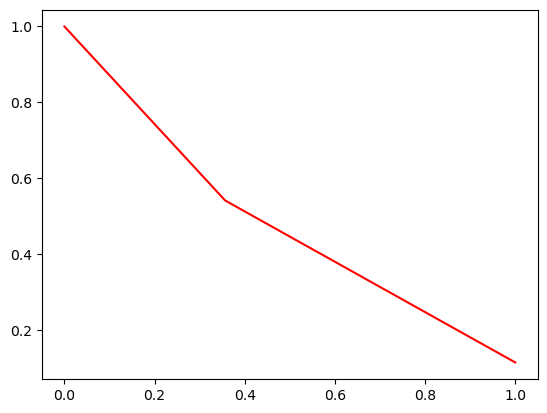

In [117]:
fig,ax=plt.subplots()
ax.plot(recall,precision,color="red")
plt.show()

In [118]:
#DF-1`
l1=["log","dt","rf","svc","knn","adaboost","xgboost"]
l2=[lg_acc,dt_acc,rf_acc,svc_acc,knn_acc,adbo_acc,xgb_acc]
l3=[fpr,fpr1,fpr2,fpr3,fpr4,fpr5,fpr6]
l4=[tpr,tpr1,tpr2,tpr3,tpr4,tpr5,tpr6]
l5=[f1score,f1score1,f1score3,f1score3,f1score4,f1score5,f1score6]

In [119]:
final=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final

,Model_Name,accuracy,fpr,tpr,f1score
0,log,88.721805,0.837209,0.980529,0.939039
1,dt,86.023883,0.581395,0.944644,0.934584
2,rf,89.385228,0.748062,0.971543,0.939010
3,svc,88.589120,0.833333,0.980030,0.939010
4,knn,88.721805,0.992248,0.999001,0.939437
5,adaboost,85.935427,0.577519,0.916126,0.920641
6,xgboost,89.208315,0.643411,0.961058,0.940401


# Class Imbalance

In [120]:
#oversampling
c_0,c_1=data["client_subscribed"].value_counts()
c_0,c_1

(10002, 1300)

In [121]:
train_0=data[data["client_subscribed"]==0]
train_1=data[data["client_subscribed"]==1]

In [122]:
train_0.shape,train_1.shape

((10002, 14), (1300, 14))

In [123]:
train_1over=train_1.sample(c_0,replace=True)

In [124]:
train_1over.shape

(10002, 14)

In [125]:
class_1=pd.concat([train_1over,train_0],axis=0)

In [126]:
train_1over.shape

(10002, 14)

In [127]:
class_1.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,client_subscribed
2187,34,4,1,2,0,520,1,0,0,12,1,1307,4,1


In [128]:
class_1.client_subscribed.value_counts()

client_subscribed
1    10002
0    10002
Name: count, dtype: int64

# Outliers

<Axes: >

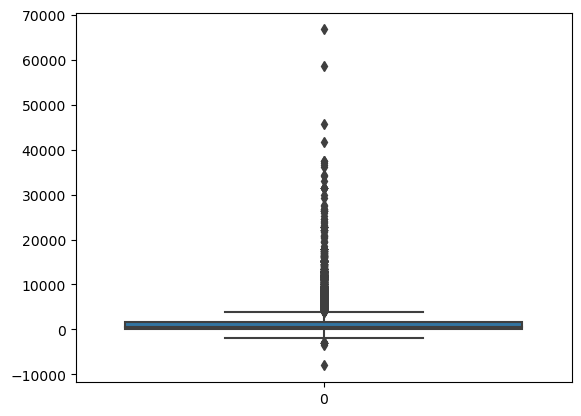

In [129]:
sns.boxplot(class_1["balance"])

<Axes: xlabel='balance', ylabel='Density'>

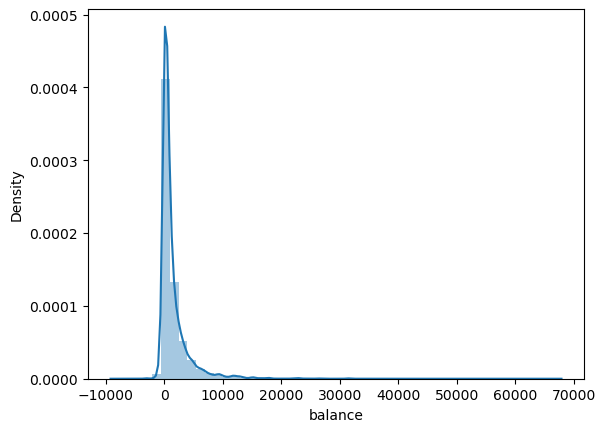

In [130]:
sns.distplot(class_1["balance"])

In [131]:
IQR=data.balance.quantile(0.75)-data.balance.quantile(0.25)
IQR

1308.0

In [132]:
lb=class_1["balance"].quantile(0.75)-IQR*3
ub=class_1["balance"].quantile(0.25)+IQR*3
lb,ub

(-2264.0, 4042.0)

In [133]:
class_1.loc[class_1["balance"]>4045.0,"balance"]=4045.0
class_1.loc[class_1["balance"]<-2264.0,"balance"]=-2264.0


<Axes: xlabel='balance', ylabel='Density'>

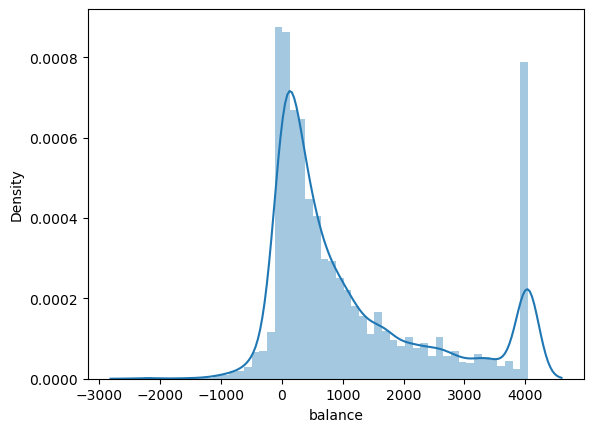

In [134]:
sns.distplot(class_1["balance"])

<Axes: >

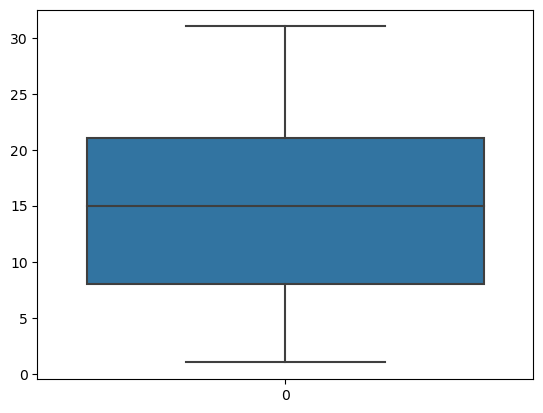

In [135]:
sns.boxplot(class_1["day"])

<Axes: >

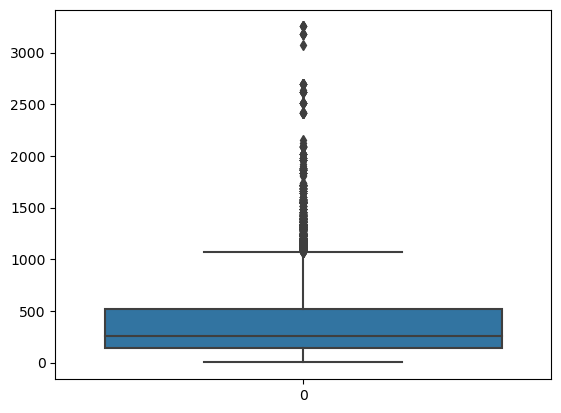

In [136]:
sns.boxplot(class_1["duration"])

<Axes: xlabel='duration', ylabel='Density'>

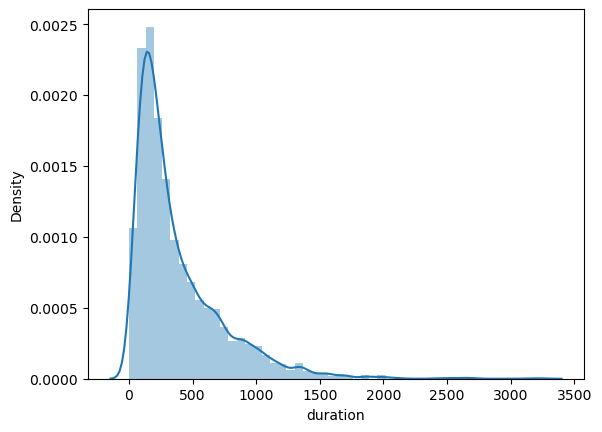

In [137]:
sns.distplot(class_1["duration"])

In [138]:
IQR1=class_1.duration.quantile(0.75)-class_1.duration.quantile(0.25)
IQR1

372.0

In [139]:
lb1=class_1["duration"].quantile(0.75)-IQR1*3
ub1=class_1["duration"].quantile(0.25)+IQR1*3
lb1,ub1

(-601.0, 1259.0)

In [140]:
class_1.loc[class_1["duration"]>1250.0,"balance"]=1250.0

<Axes: xlabel='duration', ylabel='Density'>

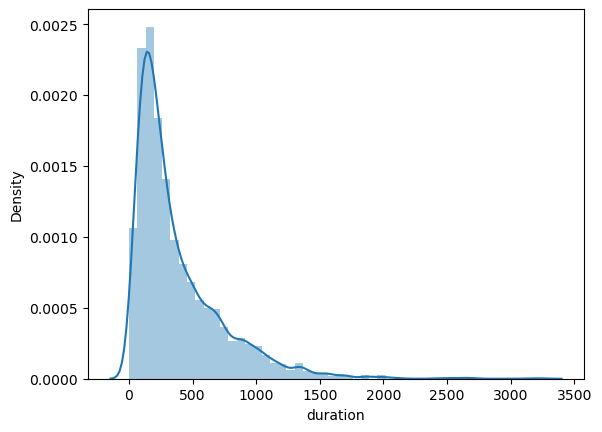

In [141]:
sns.distplot(class_1["duration"])

<Axes: >

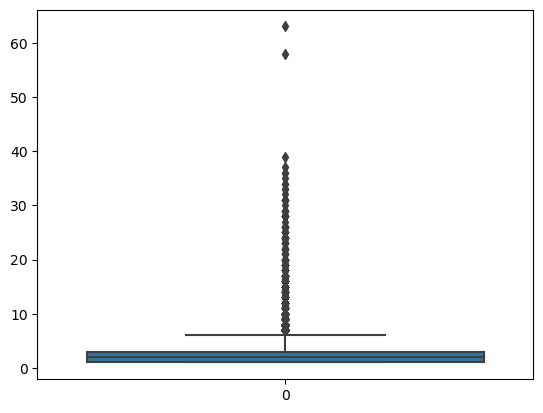

In [142]:
sns.boxplot(class_1["campaign"])

<Axes: xlabel='campaign', ylabel='Density'>

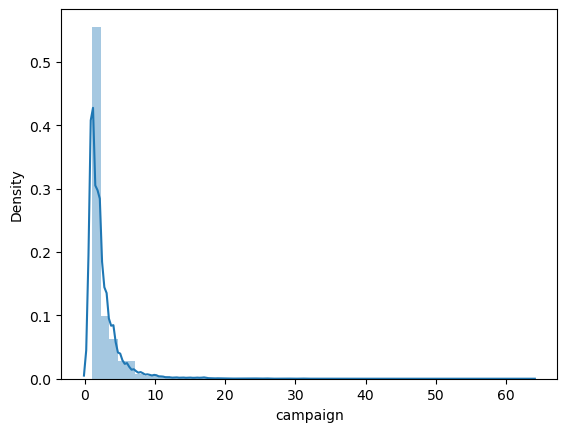

In [143]:
sns.distplot(class_1["campaign"])

In [144]:
IQR2=class_1.campaign.quantile(0.75)-class_1.campaign.quantile(0.25)
IQR2

2.0

In [145]:
lb2=class_1["campaign"].quantile(0.75)-IQR2*3
ub2=class_1["campaign"].quantile(0.25)+IQR2*3
lb2,ub2

(-3.0, 7.0)

In [146]:
class_1.loc[class_1["campaign"]>7.0,"campaign"]=7.0

<Axes: xlabel='campaign', ylabel='Density'>

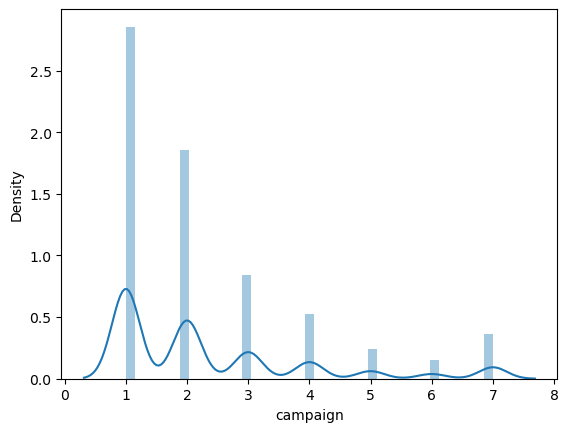

In [147]:
sns.distplot(class_1["campaign"])

In [148]:
class_1.skew()

age                  0.843742
job                  0.197433
marital             -0.174153
education            0.064776
default              8.009511
balance              1.144028
housing              0.079653
loan                 2.167788
contact              1.231221
day                  0.157845
month               -0.293559
duration             2.063660
campaign             1.465759
client_subscribed    0.000000
dtype: float64

In [149]:
class_1.shape

(20004, 14)

In [150]:
d1=class_1[class_1.balance>0]

In [151]:
d1.shape

(17376, 14)

In [152]:
d2=class_1[class_1.duration>0]

In [153]:
d2.shape

(20004, 14)

In [154]:
class_1["duration"]=np.log(class_1["duration"])

In [155]:
class_1.duration.skew()

-0.49933133997621765

In [156]:
d3=class_1[class_1.campaign>0]

In [157]:
d3.shape

(20004, 14)

In [158]:
class_1["campaign"]=np.sqrt(class_1["campaign"])

In [159]:
class_1.campaign.skew()

0.9719681907200663

In [160]:
class_1.skew()

age                  0.843742
job                  0.197433
marital             -0.174153
education            0.064776
default              8.009511
balance              1.144028
housing              0.079653
loan                 2.167788
contact              1.231221
day                  0.157845
month               -0.293559
duration            -0.499331
campaign             0.971968
client_subscribed    0.000000
dtype: float64

# Visualization

<Axes: xlabel='job'>

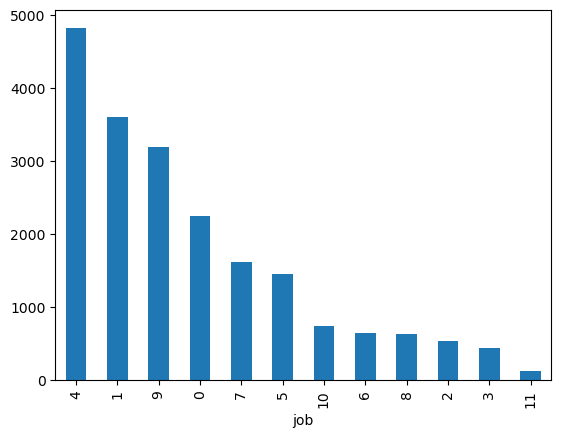

In [161]:
class_1["job"].value_counts().plot.bar()

<Axes: xlabel='marital', ylabel='count'>

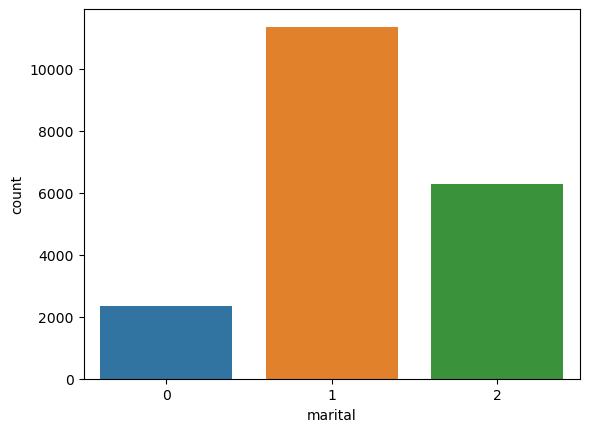

In [162]:
sns.countplot(x="marital", data=class_1)

<Axes: xlabel='education'>

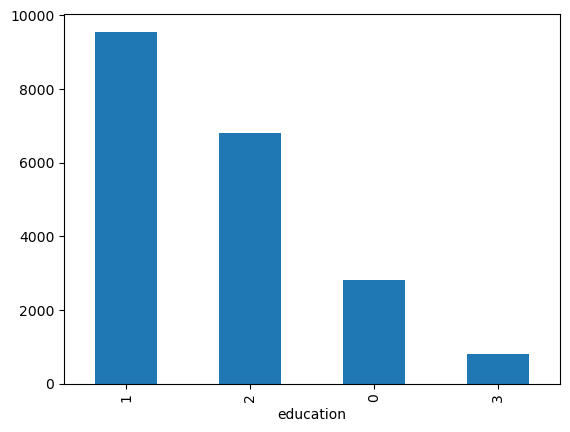

In [163]:
class_1["education"].value_counts().plot.bar()

<Axes: xlabel='client_subscribed'>

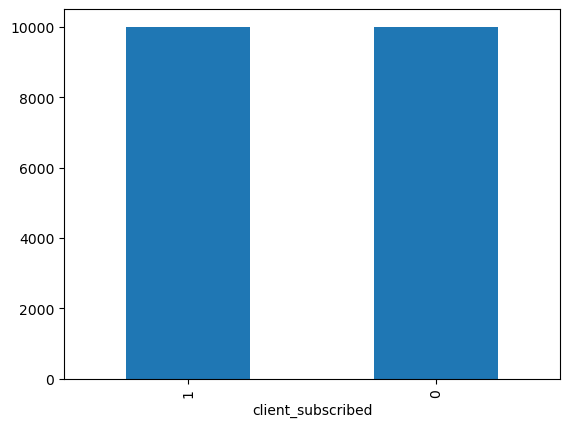

In [164]:
class_1["client_subscribed"].value_counts().plot.bar()

<Axes: xlabel='default'>

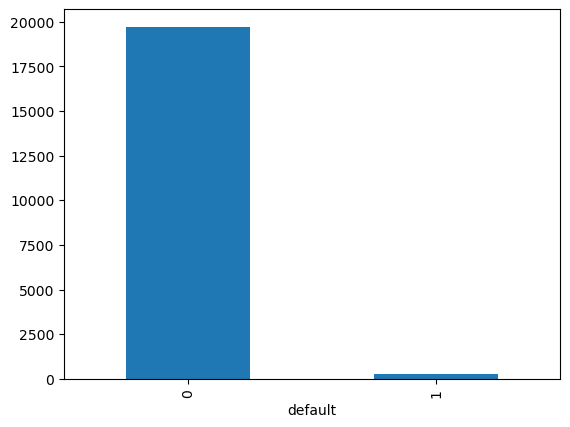

In [165]:
class_1["default"].value_counts().plot.bar()

<Axes: xlabel='housing', ylabel='count'>

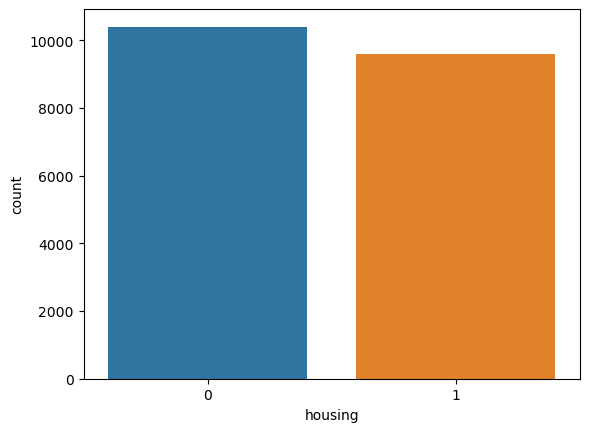

In [166]:
sns.countplot(x="housing", data=class_1)

<Axes: xlabel='loan'>

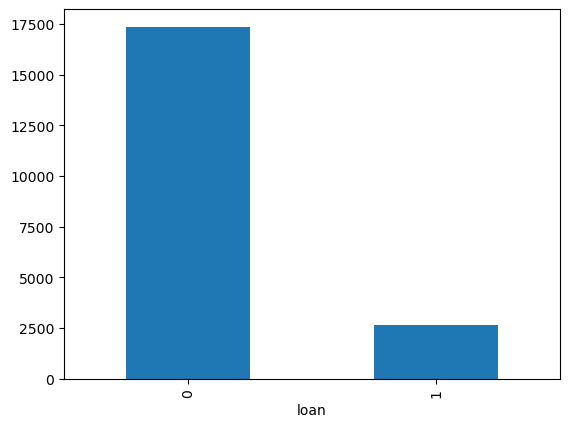

In [167]:
class_1["loan"].value_counts().plot.bar()

<Axes: xlabel='contact', ylabel='count'>

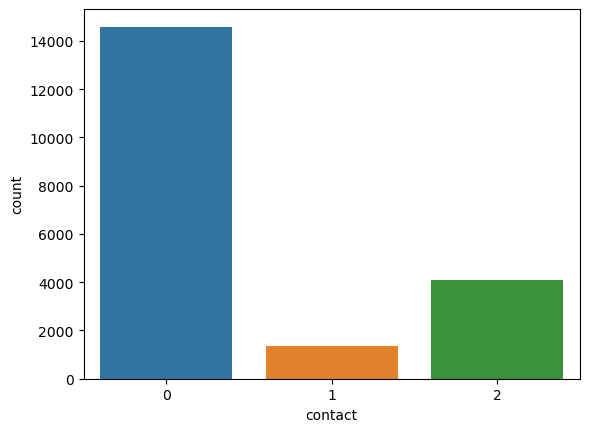

In [168]:
sns.countplot(x="contact", data=class_1)

<Axes: xlabel='month', ylabel='count'>

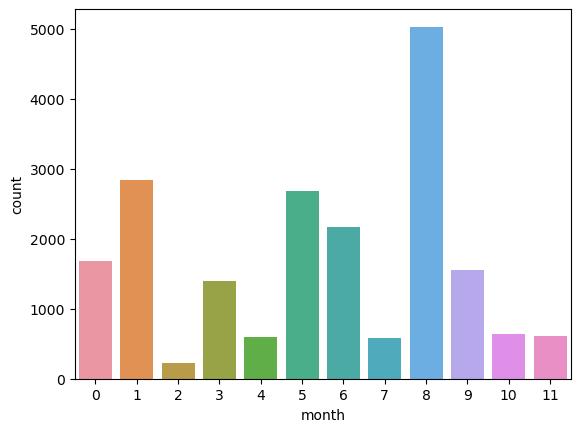

In [169]:
sns.countplot(x="month", data=class_1)

(array([1341., 2358., 2234., 1889., 2573., 2456., 2374., 1166., 1322.,
        2291.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

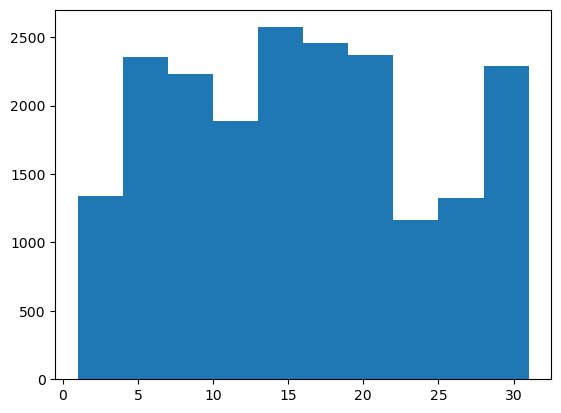

In [170]:
plt.hist(class_1["day"])

In [171]:
cor=class_1.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,client_subscribed
age,1.000000,-0.034558,-0.444250,-0.138178,-0.013207,0.133894,-0.173495,-0.033957,0.030991,0.019912,-0.049311,0.019447,0.000373,0.035922
job,-0.034558,1.000000,0.061749,0.127464,-0.005155,0.014631,-0.151950,-0.056737,-0.113663,0.025053,-0.097480,0.016956,-0.010142,0.070645
marital,-0.444250,0.061749,1.000000,0.127948,-0.026820,-0.011587,-0.035126,-0.048816,-0.054261,-0.008534,0.007507,0.007916,-0.037566,0.064040
education,-0.138178,0.127464,0.127948,1.000000,-0.021252,0.060869,-0.101507,-0.070352,-0.154415,0.011777,-0.057438,-0.012042,0.007065,0.109247
default,-0.013207,-0.005155,-0.026820,-0.021252,1.000000,-0.117382,0.007375,0.097984,0.034443,0.006090,-0.001275,-0.008594,0.038834,-0.042917
balance,0.133894,0.014631,-0.011587,0.060869,-0.117382,1.000000,-0.102093,-0.108918,-0.064967,-0.008881,0.037529,0.057016,-0.038043,0.130635
housing,-0.173495,-0.151950,-0.035126,-0.101507,0.007375,-0.102093,1.000000,0.095392,0.213142,0.000232,0.216531,-0.010739,-0.020583,-0.209124
loan,-0.033957,-0.056737,-0.048816,-0.070352,0.097984,-0.108918,0.095392,1.000000,0.039749,0.032818,0.032561,-0.024379,0.015003,-0.131662
contact,0.030991,-0.113663,-0.054261,-0.154415,0.034443,-0.064967,0.213142,0.039749,1.000000,0.012360,0.289674,-0.076034,0.027924,-0.267651
day,0.019912,0.025053,-0.008534,0.011777,0.006090,-0.008881,0.000232,0.032818,0.012360,1.000000,-0.005078,-0.040283,0.128169,-0.077312


<Axes: >

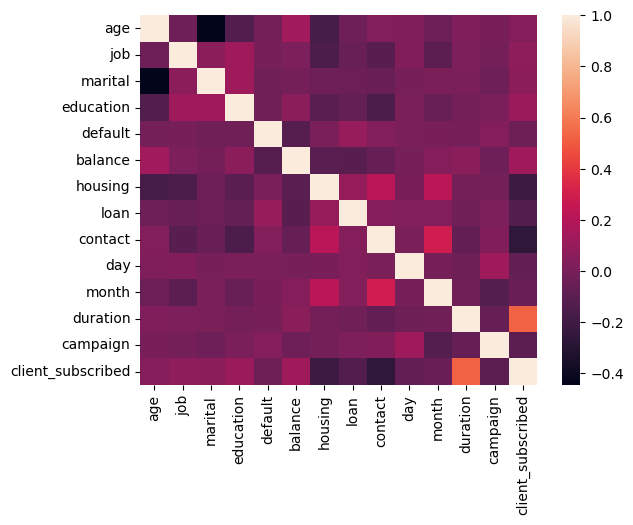

In [172]:
sns.heatmap(cor)

# Model build

In [173]:
xo=class_1.iloc[:,:-1]
yo=class_1.iloc[:,-1]

In [174]:
yo.shape,xo.shape

((20004,), (20004, 13))

In [175]:
x1_tr,x1_te,y1_tr,y1_te=train_test_split(xo,yo,test_size=0.2,random_state=100)

In [176]:
x1_tr.shape,x1_te.shape,y1_tr.shape,y1_te.shape

((16003, 13), (4001, 13), (16003,), (4001,))

# Logestic Regression

In [177]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [178]:
lg.fit(x1_tr,y1_tr)

LogisticRegression()

In [179]:
lg_p1=lg.predict(x1_te)
lg_p1

array([0, 0, 0, ..., 0, 1, 1])

In [180]:
lg_m1=confusion_matrix(lg_p1,y1_te)
lg_m1

array([[1293,  399],
       [ 665, 1644]], dtype=int64)

In [181]:
lg_acc1=lg_m1.diagonal().sum()/lg_m1.sum()*100
lg_acc1

73.40664833791553

In [182]:
print(classification_report(lg_p1,y1_te))

              precision    recall  f1-score   support

           0       0.66      0.76      0.71      1692
           1       0.80      0.71      0.76      2309

    accuracy                           0.73      4001
   macro avg       0.73      0.74      0.73      4001
weighted avg       0.74      0.73      0.74      4001



In [183]:
#tpr=tp/(tp+fn)
tpr7=1282/(1282+676)
tpr7

0.6547497446373851

In [184]:
#fpr=fp/(fp+tn)
fpr7=468/(468+1575)
fpr7

0.2290748898678414

In [185]:
#precision=tp/(tp+fp)
precesion7=1282/(1282+468)
precesion7

0.7325714285714285

In [186]:
#f1score=2(precesion*recall)/(precision+recall)
f1score7=(2*(precesion7*tpr7))/(precesion7+tpr7)
f1score7

0.691477885652643

# Decision Tree

In [187]:
#dt
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [188]:
dt.fit(x1_tr,y1_tr)

DecisionTreeClassifier()

In [189]:
dt_p1=dt.predict(x1_te)
dt_p1

array([0, 1, 1, ..., 0, 0, 1])

In [190]:
dt_m1=confusion_matrix(dt_p1,y1_te)
dt_m1

array([[1798,    5],
       [ 160, 2038]], dtype=int64)

In [191]:
dt_acc1=dt_m1.diagonal().sum()/dt_m1.sum()*100
dt_acc1

95.87603099225194

In [192]:
print(classification_report(dt_p1,y1_te))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1803
           1       1.00      0.93      0.96      2198

    accuracy                           0.96      4001
   macro avg       0.96      0.96      0.96      4001
weighted avg       0.96      0.96      0.96      4001



In [193]:
#tpr=tp/(tp+fn)
tpr8=1799/(1799+159)
tpr8

0.9187946884576098

In [194]:
#fpr=fp/(fp+tn)
fpr8=0/(0+2043)
fpr8

0.0

In [195]:
#precision=tp/(tp+fp)
precesion8=1799/(1799+0)
precesion8

1.0

In [196]:
#f1score=2(precesion*recall)/(precision+recall)
f1score8=(2*(precesion8*tpr8))/(precesion8+tpr8)
f1score8

0.9576789992014906

# RandomForest

In [197]:
#rf
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [198]:
rf.fit(x1_tr,y1_tr)

RandomForestClassifier()

In [199]:
rf_pre1=rf.predict(x1_te)
rf_pre1

array([0, 1, 1, ..., 1, 0, 1])

In [200]:
rf_mat1=confusion_matrix(rf_pre1,y1_te)
rf_mat1

array([[1853,    5],
       [ 105, 2038]], dtype=int64)

In [201]:
rf_acc1=rf_mat1.diagonal().sum()/rf_mat1.sum()*100
rf_acc1

97.25068732816796

In [202]:
print(classification_report (rf_pre1,y1_te))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1858
           1       1.00      0.95      0.97      2143

    accuracy                           0.97      4001
   macro avg       0.97      0.97      0.97      4001
weighted avg       0.97      0.97      0.97      4001



In [203]:
#tpr=tp/(tp+fn)
tpr9=1850/(1850+108)
tpr9

0.9448416751787538

In [204]:
#fpr=fp/(fp+tn)
fpr9=2/(2+2041)
fpr9

0.0009789525208027412

In [205]:
#precision=tp/(tp+fp)
precesion9=1850/(1850+2)
precesion9

0.9989200863930886

In [206]:
#f1score=2(precesion*recall)/(precision+recall)
f1score9=(2*(precesion9*tpr9))/(precesion9+tpr9)
f1score9

0.9711286089238846

In [207]:
precision,recall,threshold=precision_recall_curve(y1_te,rf_pre1)

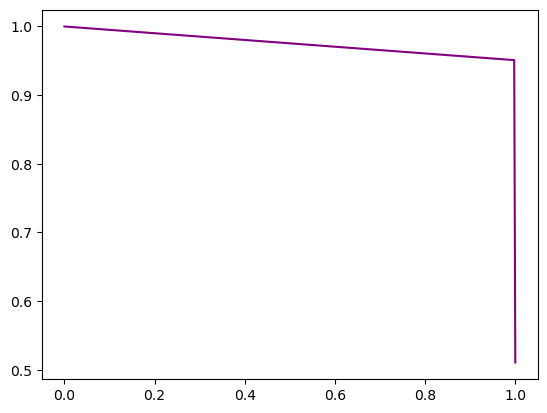

In [208]:
fig,ax=plt.subplots()
ax.plot(recall,precision,color="purple")
plt.show()

# Support Vector Machine

In [209]:
#svm
from sklearn.svm import SVC
svc=SVC()

In [210]:
svc.fit(x1_tr,y1_tr)

SVC()

In [211]:
svc_p1=svc.predict(x1_te)

In [212]:
svc_m1=confusion_matrix(svc_p1,y1_te)
svc_m1

array([[1155,  926],
       [ 803, 1117]], dtype=int64)

In [213]:
svc_acc1=svc_m1.diagonal().sum()/svc_m1.sum()*100
svc_acc1

56.78580354911272

In [214]:
print(classification_report(svc_p1,y1_te))

              precision    recall  f1-score   support

           0       0.59      0.56      0.57      2081
           1       0.55      0.58      0.56      1920

    accuracy                           0.57      4001
   macro avg       0.57      0.57      0.57      4001
weighted avg       0.57      0.57      0.57      4001



In [215]:
#tpr=tp/(tp+fn)
tpr10=1155/(1155+803)
tpr10

0.5898876404494382

In [216]:
#fpr=fp/(fp+tn)
fpr10=882/(882+1161)
fpr10

0.43171806167400884

In [217]:
#precision=tp/(tp+fp)
precesion10=1155/(1155+882)
precesion10

0.5670103092783505

In [218]:
#f1score=2(precesion*recall)/(precision+recall)
f1score10=(2*(precesion10*tpr10))/(precesion10+tpr10)
f1score10

0.5782227784730913

# K Nearest Neighbors

In [219]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [220]:
knn.fit(x1_tr,y1_tr)

KNeighborsClassifier(n_neighbors=15)

In [221]:
knn_p1=knn.predict(x1_te)

In [222]:
knn_m1=confusion_matrix(knn_p1,y1_te)
knn_m1

array([[1257,  423],
       [ 701, 1620]], dtype=int64)

In [223]:
knn_acc1=knn_m1.diagonal().sum()/knn_m1.sum()*100
knn_acc1

71.90702324418895

In [224]:
print(classification_report(knn_p1,y1_te))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1680
           1       0.79      0.70      0.74      2321

    accuracy                           0.72      4001
   macro avg       0.72      0.72      0.72      4001
weighted avg       0.73      0.72      0.72      4001



In [225]:
#tpr=tp/(tp+fn)
tpr11=1281/(1281+681)
tpr11

0.6529051987767585

In [226]:
#fpr=fp/(fp+tn)
fpr11=363/(363+1680)
fpr11

0.1776798825256975

In [227]:
#precision=tp/(tp+fp)
precesion11=1281/(1281+363)
precesion11

0.7791970802919708

In [228]:
#f1score=2(precesion*recall)/(precision+recall)
f1score11=(2*(precesion11*tpr11))/(precesion11+tpr11)
f1score11

0.7104825291181364

# AdaBoost

In [229]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [230]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [231]:
adbo.fit(x1_tr,y1_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [232]:
adbo_p1=adbo.predict(x1_te)

In [233]:
adboo_m1=confusion_matrix(adbo_p1,y1_te)
adboo_m1

array([[1802,    5],
       [ 156, 2038]], dtype=int64)

In [234]:
adbo_acc1=adboo_m1.diagonal().sum()/adboo_m1.sum()*100
adbo_acc1

95.97600599850038

In [235]:
print(classification_report(adbo_p1,y1_te))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1807
           1       1.00      0.93      0.96      2194

    accuracy                           0.96      4001
   macro avg       0.96      0.96      0.96      4001
weighted avg       0.96      0.96      0.96      4001



In [236]:
#tpr=tp/(tp+fn)
tpr12=1807/(1807+151)
tpr12

0.9228804902962207

In [237]:
#fpr=fp/(fp+tn)
fpr12=10/(10+2033)
fpr12

0.004894762604013705

In [238]:
#precision=tp/(tp+fp)
precesion12=1807/(1807+10)
precesion12

0.9944964226747386

In [239]:
#f1score=2(precesion*recall)/(precision+recall)
f1score12=(2*(precesion12*tpr12))/(precesion12+tpr12)
f1score12

0.9573509933774835

# XG Boost

In [240]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [241]:
xgb.fit(x1_tr,y1_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [242]:
xgb_p1=xgb.predict(x1_te)

In [243]:
xgb_m1=confusion_matrix(xgb_p1,y1_te)
xgb_m1

array([[1785,   10],
       [ 173, 2033]], dtype=int64)

In [244]:
xgb_acc1=xgb_m1.diagonal().sum()/xgb_m1.sum()*100
xgb_acc1

95.42614346413396

In [245]:
print(classification_report(xgb_p1,y1_te))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1795
           1       1.00      0.92      0.96      2206

    accuracy                           0.95      4001
   macro avg       0.95      0.96      0.95      4001
weighted avg       0.96      0.95      0.95      4001



In [246]:
#tpr=tp/(tp+fn)
tpr13=1771/(1771+187)
tpr13

0.9044943820224719

In [247]:
#fpr=fp/(fp+tn)
fpr13=4/(4+2039)
fpr13

0.0019579050416054823

In [248]:
#precision=tp/(tp+fp)
precesion13=1771/(1771+4)
precesion13

0.9977464788732394

In [249]:
#f1score=2(precesion*recall)/(precision+recall)
f1score13=(2*(precesion13*tpr13))/(precesion13+tpr13)
f1score13

0.9488347173854809

In [250]:
#DF-2
l1=["log","dt","rf","svc","knn","adaboost","xgboost"]
l2=[lg_acc1,dt_acc1,rf_acc1,svc_acc1,knn_acc1,adbo_acc1,xgb_acc1]
l3=[fpr7,fpr8,fpr9,fpr10,fpr11,fpr12,fpr13]
l4=[tpr7,tpr8,tpr9,tpr10,tpr11,tpr12,tpr13]
l5=[f1score7,f1score8,f1score9,f1score10,f1score11,f1score12,f1score13]

In [251]:
final=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final

,Model_Name,accuracy,fpr,tpr,f1score
0,log,73.406648,0.229075,0.654750,0.691478
1,dt,95.876031,0.000000,0.918795,0.957679
2,rf,97.250687,0.000979,0.944842,0.971129
3,svc,56.785804,0.431718,0.589888,0.578223
4,knn,71.907023,0.177680,0.652905,0.710483
5,adaboost,95.976006,0.004895,0.922880,0.957351
6,xgboost,95.426143,0.001958,0.904494,0.948835


# Feature Selection

In [252]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dTree=DecisionTreeClassifier()

In [253]:
rfe=RFE(dTree)

In [254]:
rfe.fit(class_1.iloc[:,:-1],class_1.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier())

In [255]:
rfe.support_

array([ True, False, False, False, False,  True, False, False,  True,
        True,  True,  True, False])

In [256]:
rfe_df=pd.DataFrame({"Importances":list(rfe.support_),"Columns":list(class_1.iloc[:,:-1].columns)})
rfe_df

,Importances,Columns
0,True,age
1,False,job
2,False,marital
3,False,education
4,False,default
5,True,balance
6,False,housing
7,False,loan
8,True,contact
9,True,day


In [257]:
sorted_df =rfe_df.sort_values(["Importances"],ascending=False)
sorted_df

,Importances,Columns
0,True,age
5,True,balance
8,True,contact
9,True,day
10,True,month
11,True,duration
1,False,job
2,False,marital
3,False,education
4,False,default


In [258]:
class_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'client_subscribed'],
      dtype='object')

In [259]:
d1=class_1.drop(["marital","education","default","balance","housing","loan","contact","campaign"],axis=1)

In [260]:
d1.head(1)

,age,job,day,month,duration,client_subscribed
2187,34,4,12,1,7.17549,1


In [261]:
x2=d1.iloc[:,:-1]
y2=d1.iloc[:,-1]

In [262]:
x2.head(1)
#y2.head()

,age,job,day,month,duration
2187,34,4,12,1,7.17549


In [263]:
from sklearn.model_selection import train_test_split

In [264]:
x2_tr,x2_te,y2_tr,y2_te=train_test_split(x2,y2,test_size=0.2,random_state=100)

In [265]:
x2_tr.shape,x2_te.shape,y2_tr.shape,y2_te.shape

((16003, 5), (4001, 5), (16003,), (4001,))

# Logistic Regression

In [266]:
#log
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [267]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [268]:
lg.fit(x2_tr,y2_tr)

LogisticRegression()

In [269]:
lg_p3=lg.predict(x2_te)
lg_p3

array([0, 0, 1, ..., 1, 0, 1])

In [270]:
pred_prob3=lg.predict_proba(x2_te)
pred_prob3

array([[0.99408122, 0.00591878],
       [0.56811634, 0.43188366],
       [0.23849604, 0.76150396],
       ...,
       [0.12299119, 0.87700881],
       [0.61069431, 0.38930569],
       [0.13039715, 0.86960285]])

In [271]:
lg_m3=confusion_matrix(lg_p3,y2_te)
lg_m3

array([[1422,  551],
       [ 536, 1492]], dtype=int64)

In [272]:
lg_acc3=lg_m3.diagonal().sum()/lg_m3.sum()*100
lg_acc3

72.831792051987

In [273]:
print(classification_report(lg_p3,y2_te))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1973
           1       0.73      0.74      0.73      2028

    accuracy                           0.73      4001
   macro avg       0.73      0.73      0.73      4001
weighted avg       0.73      0.73      0.73      4001



In [274]:
#AUC-ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [275]:
roc2=roc_auc_score(lg_p3,y2_te)
roc2

0.7282150251271855

In [276]:
df1=pd.DataFrame(pred_prob3)
df1

,0,1
0,0.994081,0.005919
1,0.568116,0.431884
2,0.238496,0.761504
3,0.183470,0.816530
4,0.774355,0.225645
...,...,...
3996,0.139187,0.860813
3997,0.371780,0.628220
3998,0.122991,0.877009
3999,0.610694,0.389306


In [277]:
fpr14,tpr14,thrshold=roc_curve(y2_te,df1.iloc[:,1])

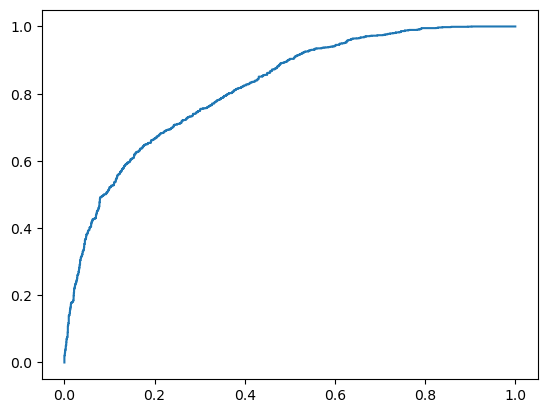

In [278]:
plt.plot(fpr14,tpr14)

In [279]:
#tpr=tp/(tp+fn)
tpr14=1428/(1428+553)
tpr14

0.7208480565371025

In [280]:
#fpr=fp/(fp+tn)
fpr14=553/(553+1490)
fpr14

0.2706803720019579

In [281]:
#precision=tp/(tp+fp)
precesion14=1428/(1428+553)
precesion14

0.7208480565371025

In [282]:
#f1score=2(precesion*recall)/(precision+recall)
f1score14=(2*(precesion14*tpr14))/(precesion6+tpr14)
f1score14

0.6331215577438826

# DecisionTree

In [283]:
#dt
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [284]:
dt.fit(x2_tr,y2_tr)

DecisionTreeClassifier()

In [285]:
dt_p3=dt.predict(x2_te)
dt_p3

array([0, 1, 1, ..., 0, 0, 1])

In [286]:
dt_m3=confusion_matrix(dt_p3,y2_te)
dt_m3

array([[1790,    6],
       [ 168, 2037]], dtype=int64)

In [287]:
dt_acc3=dt_m3.diagonal().sum()/dt_m3.sum()*100
dt_acc3

95.65108722819295

In [288]:
print(classification_report(dt_p3,y2_te))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1796
           1       1.00      0.92      0.96      2205

    accuracy                           0.96      4001
   macro avg       0.96      0.96      0.96      4001
weighted avg       0.96      0.96      0.96      4001



In [289]:
#tpr=tp/(tp+fn)
tpr15=1797/(1797+161)
tpr15

0.9177732379979571

In [290]:
#fpr=fp/(fp+tn)
fpr15=0/(0+2043)
fpr15

0.0

In [291]:
#precision=tp/(tp+fp)
precesion15=1797/(1797+0)
precesion15

1.0

In [292]:
#f1score=2(precesion*recall)/(precision+recall)
f1score15=(2*(precesion15*tpr15))/(precesion15+tpr15)
f1score15

0.9571238348868175

# Random Forest

In [293]:
#rf
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [294]:
rf.fit(x2_tr,y2_tr)

RandomForestClassifier()

In [295]:
rf_pre3=rf.predict(x2_te)
rf_pre3

array([0, 1, 1, ..., 1, 0, 1])

In [296]:
rf_mat3=confusion_matrix(rf_pre3,y2_te)
rf_mat3

array([[1832,    6],
       [ 126, 2037]], dtype=int64)

In [297]:
rf_acc3=rf_mat3.diagonal().sum()/rf_mat3.sum()*100
rf_acc3

96.70082479380156

In [298]:
print(classification_report (rf_pre3,y2_te))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1838
           1       1.00      0.94      0.97      2163

    accuracy                           0.97      4001
   macro avg       0.97      0.97      0.97      4001
weighted avg       0.97      0.97      0.97      4001



In [299]:
#tpr=tp/(tp+fn)
tpr16=1829/(1829+129)
tpr16

0.9341164453524005

In [300]:
#fpr=fp/(fp+tn)
fpr16=186/(186+2043)
fpr16

0.08344549125168237

In [301]:
#precision=tp/(tp+fp)
precesion16=1829/(1829+186)
precesion16

0.9076923076923077

In [302]:
#f1score=2(precesion*recall)/(precision+recall)
f1score16=(2*(precesion16*tpr16))/(precesion16+tpr16)
f1score16

0.9207148250692172

In [303]:
precision,recall,threshold=precision_recall_curve(y2_te,rf_pre3)

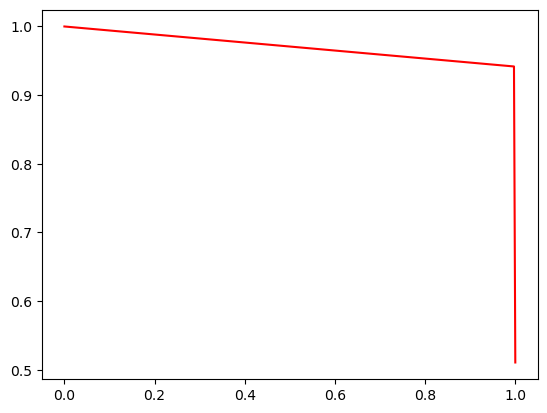

In [304]:
fig,ax=plt.subplots()
ax.plot(recall,precision,color="red")
plt.show()

# Naive Bayes

In [305]:
#nb
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [306]:
nb.fit(x2_tr,y2_tr)

MultinomialNB()

In [307]:
nb_p3=nb.predict(x2_te)

In [308]:
nb_m3=confusion_matrix(nb_p3,y2_te)
nb_m3

array([[1122,  874],
       [ 836, 1169]], dtype=int64)

In [309]:
nb_acc3=nb_m3.diagonal().sum()/nb_m3.sum()*100
nb_acc3

57.260684828792805

In [310]:
print(classification_report(nb_p3,y2_te))

              precision    recall  f1-score   support

           0       0.57      0.56      0.57      1996
           1       0.57      0.58      0.58      2005

    accuracy                           0.57      4001
   macro avg       0.57      0.57      0.57      4001
weighted avg       0.57      0.57      0.57      4001



In [311]:
#tpr=tp/(tp+fn)
tpr17=1120/(1120+882)
tpr17

0.5594405594405595

In [312]:
#fpr=fp/(fp+tn)
fpr17=892/(892+1161)
fpr17

0.4344861178762786

In [313]:
#precision=tp/(tp+fp)
precesion17=1120/(1120+892)
precesion17

0.5566600397614314

In [314]:
#f1score=2(precesion*recall)/(precision+recall)
f1score17=(2*(precesion17*tpr17))/(precesion17+tpr17)
f1score17

0.5580468360737418

# Support Vector Machine

In [315]:
#svm
from sklearn.svm import SVC
svc=SVC()

In [316]:
svc.fit(x2_tr,y2_tr)

SVC()

In [317]:
svc_p3=svc.predict(x2_te)

In [318]:
svc_m3=confusion_matrix(svc_p3,y2_te)
svc_m3

array([[1463,  427],
       [ 495, 1616]], dtype=int64)

In [319]:
svc_acc3=svc_m3.diagonal().sum()/svc_m3.sum()*100
svc_acc3

76.95576105973507

In [320]:
print(classification_report(svc_p3,y2_te))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1890
           1       0.79      0.77      0.78      2111

    accuracy                           0.77      4001
   macro avg       0.77      0.77      0.77      4001
weighted avg       0.77      0.77      0.77      4001



In [321]:
#tpr=tp/(tp+fn)
tpr18=1460/(1460+498)
tpr18

0.745658835546476

In [322]:
#fpr=fp/(fp+tn)
fpr18=430/(430+1613)
fpr18

0.21047479197258934

In [323]:
#precision=tp/(tp+fp)
precesion18=1460/(1460+430)
precesion18

0.7724867724867724

In [324]:
#f1score=2(precesion*recall)/(precision+recall)
f1score18=(2*(precesion18*tpr18))/(precesion18+tpr18)
f1score18

0.7588357588357588

# K Nearest Neighbors

In [325]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)

In [326]:
knn.fit(x2_tr,y2_tr)

KNeighborsClassifier(n_neighbors=15)

In [327]:
knn_p3=knn.predict(x2_te)

In [328]:
knn_m3=confusion_matrix(knn_p3,y2_te)
knn_m3

array([[1442,  386],
       [ 516, 1657]], dtype=int64)

In [329]:
knn_acc3=knn_m3.diagonal().sum()/knn_m3.sum()*100
knn_acc3

77.45563609097725

In [330]:
print(classification_report(knn_p3,y2_te))

              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1828
           1       0.81      0.76      0.79      2173

    accuracy                           0.77      4001
   macro avg       0.77      0.78      0.77      4001
weighted avg       0.78      0.77      0.77      4001



In [331]:
#tpr=tp/(tp+fn)
tpr19=1473/(1473+485)
tpr19

0.7522982635342186

In [332]:
#fpr=fp/(fp+tn)
fpr19=383/(383+1660)
fpr19

0.18746940773372492

In [333]:
#precision=tp/(tp+fp)
precesion19=1473/(1473+383)
precesion19

0.7936422413793104

In [334]:
#f1score=2(precesion*recall)/(precision+recall)
f1score19=(2*(precesion19*tpr19))/(precesion19+tpr19)
f1score19

0.772417409543786

# AdaBoost

In [335]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [336]:
adbo=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=5)

In [337]:
adbo.fit(x2_tr,y2_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

In [338]:
adbo_p3=adbo.predict(x2_te)

In [339]:
adboo_m3=confusion_matrix(adbo_p3,y2_te)
adboo_m3

array([[1782,    6],
       [ 176, 2037]], dtype=int64)

In [340]:
adbo_acc3=adboo_m3.diagonal().sum()/adboo_m3.sum()*100
adbo_acc3

95.45113721569608

In [341]:
print(classification_report(adbo_p3,y2_te))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1788
           1       1.00      0.92      0.96      2213

    accuracy                           0.95      4001
   macro avg       0.95      0.96      0.95      4001
weighted avg       0.96      0.95      0.95      4001



In [342]:
#tpr=tp/(tp+fn)
tpr20=1778/(1779+160)
tpr20

0.9169675090252708

In [343]:
#fpr=fp/(fp+tn)
fpr20=0/(0+2043)
fpr20

0.0

In [344]:
#precision=tp/(tp+fp)
precesion20=1778/(1778+0)
precesion20

1.0

In [345]:
#f1score=2(precesion*recall)/(precision+recall)
f1score20=(2*(precesion20*tpr20))/(precesion20+tpr20)
f1score20

0.9566854990583804

# XG Boost

In [346]:
#xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [347]:
xgb.fit(x2_tr,y2_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [348]:
xgb_p3=xgb.predict(x2_te)

In [349]:
xgb_m3=confusion_matrix(xgb_p3,y2_te)
xgb_m3

array([[1749,   48],
       [ 209, 1995]], dtype=int64)

In [350]:
xgb_acc3=xgb_m3.diagonal().sum()/xgb_m3.sum()*100
xgb_acc3

93.57660584853787

In [351]:
print(classification_report(xgb_p3,y2_te))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1797
           1       0.98      0.91      0.94      2204

    accuracy                           0.94      4001
   macro avg       0.93      0.94      0.94      4001
weighted avg       0.94      0.94      0.94      4001



In [352]:
#tpr=tp/(tp+fn)
tpr21=1735/(1735+223)
tpr21

0.8861082737487231

In [353]:
#fpr=fp/(fp+tn)
fpr21=52/(52+1991)
fpr21

0.025452765540871267

In [354]:
#precision=tp/(tp+fp)
precesion21=1735/(1735+52)
precesion21

0.9709009513150532

In [355]:
#f1score=2(precesion*recall)/(precision+recall)
f1score21=(2*(precesion21*tpr21))/(precesion21+tpr21)
f1score21

0.9265687583444593

In [356]:
#DF-3
l1=["log","dt","rf","nb","svc","knn","adaboost","xgboost"]
l2=[lg_acc3,dt_acc3,rf_acc3,nb_acc3,svc_acc3,knn_acc3,adbo_acc3,xgb_acc3]
l3=[fpr14,fpr15,fpr16,fpr17,fpr18,fpr19,fpr20,fpr21]
l4=[tpr14,tpr15,tpr16,tpr17,tpr18,tpr19,tpr20,tpr21]
l5=[f1score14,f1score15,f1score16,f1score17,f1score18,f1score19,f1score20,f1score21]

In [357]:
final=pd.DataFrame({"Model_Name":l1,"accuracy":l2,"fpr":l3,"tpr":l4,"f1score":l5})
final

,Model_Name,accuracy,fpr,tpr,f1score
0,log,72.831792,0.270680,0.720848,0.633122
1,dt,95.651087,0.000000,0.917773,0.957124
2,rf,96.700825,0.083445,0.934116,0.920715
3,nb,57.260685,0.434486,0.559441,0.558047
4,svc,76.955761,0.210475,0.745659,0.758836
5,knn,77.455636,0.187469,0.752298,0.772417
6,adaboost,95.451137,0.000000,0.916968,0.956685
7,xgboost,93.576606,0.025453,0.886108,0.926569
